# Lab Assignment 1 - Apriori Algorithm

## Data Sets 

| Dataset | Size(bytes) | Transactions |
| :- | :-: | :-: |
| retail.dat | 4167490 | 88162 |
| mushroom.dat | 570408 | 8124 |
| chess.dat | 342294 | 3196 |


Altough **retail.dat** is the biggest dataset, it has a lot of **variation in the items count for each transaction**. This really helps in the **pruning step**.

### Questions :

Q1) [Basic Apriori Algo](#Q1:-Implementing-Basic-Apriori-ALgorithm)<br/>
Q2) [Apriori Algo using Hash function](#Q2:-Apriori-Using-Hashing-Function)<br/>

------

## Importing required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

------

## Importing data from file and cleaning

In [2]:
data = {}
f = open('data/retail.dat', 'r')

c = 1
for x in f:
    if c == 10001:
        break
    data['T'+str(c)] = (set(x.split()))
    c += 1
    
f.close()

dfdata = {'TID':list(data.keys()), "List of Item ID\'s":list(data.values())}
df = pd.DataFrame(dfdata)

In [3]:
df

,TID,List of Item ID's
0,T1,"{14, 11, 12, 25, 2, 4, 8, 21, 7, 3, 10, 15, 16..."
1,T2,"{32, 30, 31}"
2,T3,"{33, 35, 34}"
3,T4,"{42, 38, 44, 45, 37, 40, 43, 41, 36, 46, 39}"
4,T5,"{38, 47, 39, 48}"
...,...,...
9995,T9996,"{4401, 5042, 57, 1319, 5680}"
9996,T9997,"{1121, 1991, 824, 3026, 3465, 48, 4067, 38, 75..."
9997,T9998,"{8599, 4565, 3393, 3300, 533, 6640}"
9998,T9999,"{4484, 171, 1629, 1618, 932, 3744, 773, 41, 89..."


------

## Setting Min Support Count & Min Confidence

In [4]:
min_SC = 200
min_confidence = 0.6

------

## Utility Functions

In [5]:
def findSC(data, items):
    '''
    params:
        data : dictionary (TID : list items)
        items : string (items with a space delimiter)
    
    return:
        SC : int
    '''
    SC = 0
    s1 = set(items.split())
    
    for i,j in data.items():
        if s1.issubset(j):
            SC += 1
    
    return SC

def get_C_and_L(cdict, min_SC):
    '''
    params:
        cdict : dictionary (list items(string) : SC(int))
        min_SC : int (minimum support count)
    
    return:
        C : dataframe containing C values
        L : dataframe containing L values
    '''
    Cdata = {'Itemset':list(cdict.keys()), "Support Count":list(cdict.values())}
    C = pd.DataFrame(Cdata)

    # creating L2
    ldict = {} # will store only those vals with SC > min_SC

    for i,j in cdict.items():
        if j >= min_SC:
            ldict[i] = j

    Ldata = {'Itemset':list(ldict.keys()), "Support Count":list(ldict.values())}
    L = pd.DataFrame(Ldata)
    
    return C, L

def get_subsets(L):
    '''
    function to generating all the subsets of size 
    one less than the previous set.
    
    params:
        L : dataframe containing L values
    
    return:
        newl : set of unique subset conbinations
    '''
    
    l = list(L['Itemset'])
    n = len(l[0].split())
    newl = set()
    for i in range(len(l)-1):
        s1 = set(l[i].split())
        for j in range(i+1, len(l)):
            s2 = set(l[j].split())
            new = sorted(list(s1.union(s2)))
            
            if len(new) > n+1:
                continue
            
            newl.add(" ".join(new))
            
    return list(newl)

def get_rules(A, all_L):
    '''
    To get all the possible subsets of the given set
    
    param : A (list) 
    
    return : valid_rules (list of list containing all the valid rules) 
    '''
    n = len(A)
    ps = [] # stores all the rules
    
    for i in range(1, (1 << n) - 1):
        LHS = ""
        RHS = ""
        c = 0
        while(c < n):
            if(i&1):
                LHS += A[c] + " "
            else:
                RHS += A[c] + " "
                
            c += 1
            i >>= 1
        ps.append([LHS[:-1], RHS[:-1]])
    
    
    k_frequent_SC = int(all_L["Support Count"][all_L['Itemset'] == " ".join(A)])
    valid_rules = [] # stores the valid rules

    for i in range(len(ps)):
        LHS_SC = int(all_L["Support Count"][all_L['Itemset'] == ps[i][0]])

        if(k_frequent_SC/LHS_SC > min_confidence):
            valid_rules.append([ps[i][0], ps[i][1]])

    return valid_rules

------

## Q1: Implementing Basic Apriori ALgorithm

## Generating C<sub>1</sub> and L<sub>1</sub>

In [6]:
allitems = set()
for i in tqdm(data.values()):
    allitems = allitems.union(i)

print("Number of unique Items", len(allitems))

100%|██████████| 10000/10000 [00:01<00:00, 6209.02it/s]

Number of unique Items 8600


In [7]:
# creating C1
c1dict = { i:0 for i in allitems} # will store the Support Count
for i in tqdm(data.values()):
    for j in i:
        c1dict[j] += 1

C1, L1 = get_C_and_L(c1dict, min_SC)

100%|██████████| 10000/10000 [00:00<00:00, 421093.72it/s]


In [8]:
C1

,Itemset,Support Count
0,1488,12
1,8093,1
2,3357,10
3,3989,11
4,155,82
...,...,...
8595,851,31
8596,5245,5
8597,1323,8
8598,2764,32


In [9]:
L1

,Itemset,Support Count
0,475,304
1,32,1828
2,65,393
3,1121,258
4,48,4312
5,237,329
6,170,391
7,38,1722
8,36,321
9,41,2663


------

## Generating C<sub>i</sub> and L<sub>i</sub> (for i>1)

In [10]:
L = L1.copy()
all_L = L1.copy()
num_cycles = 0 # number of cycles
num_k_frequent = [len(L1)]

while(len(L) != 0):
    # generating all the subsets of size one more than the prev
    newl = get_subsets(L)

    # creating C
    cdict = {i:0 for i in newl} # to store the SC of C2

    for i,j in tqdm(cdict.items()):
        cdict[i] += findSC(data, i)

    # creating L
    C, L = get_C_and_L(cdict, min_SC)
    
    # storing the results
    all_L = all_L.append(L, ignore_index=True)
    num_cycles += 1
    num_k_frequent.append(len(L))

100%|██████████| 1/1 [00:00<00:00, 407.25it/s]


## Plotting the Variation

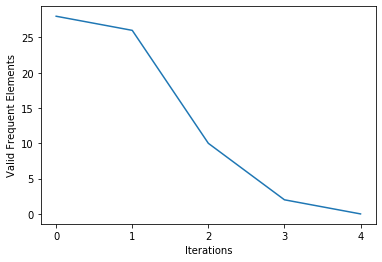

In [11]:
plt.plot(range(num_cycles+1), num_k_frequent)
plt.ylabel('Valid Frequent Elements')
plt.xlabel('Iterations')
plt.xticks(range(num_cycles+1))
plt.show()

## Frequent Item Sets

In [12]:
all_L

,Itemset,Support Count
0,475,304.0
1,32,1828.0
2,65,393.0
3,1121,258.0
4,48,4312.0
...,...,...
61,38 39 41,530.0
62,32 39 41,427.0
63,38 39 48,583.0
64,38 39 41 48,315.0


## Closed Frequent Itemset

In [13]:
freq_items_list = [list(j) for i,j in list(all_L.iterrows())]
n = len(freq_items_list)
max_k = len(freq_items_list[n-1][0].split())

closed_frequent_itemset = []

for i in range(n):
    s1 = set(freq_items_list[i][0].split())
    flag = 0
    if len(s1) == max_k:
        closed_frequent_itemset.append(freq_items_list[i])
        continue
        
    for j in range(n):
        if i == j:
            continue
            
        s2 = set(freq_items_list[j][0].split())
        
        if s1.issubset(s2) and freq_items_list[i][1] <= freq_items_list[j][1]:
            flag = 1
            break
    
    if flag == 0 and freq_items_list[i] not in closed_frequent_itemset:
        closed_frequent_itemset.append(freq_items_list[i])


CFI = [i for i,j in closed_frequent_itemset]
SC = [j for i,j in closed_frequent_itemset]
closed_frequent_itemset_df = pd.DataFrame({"Closed Frequent Itemset":CFI,"Support Count":SC})

closed_frequent_itemset_df

,Closed Frequent Itemset,Support Count
0,475,304.0
1,32,1828.0
2,65,393.0
3,1121,258.0
4,48,4312.0
...,...,...
61,38 39 41,530.0
62,32 39 41,427.0
63,38 39 48,583.0
64,38 39 41 48,315.0


## Finding all the frequent items with max k

In [14]:
len_of_max_k_frequent = len(num_k_frequent)-1
max_k_frequent_items = []

for i in range(len(all_L)-1,-1,-1):
    if len(list(all_L.iloc[i])[0].split()) == len_of_max_k_frequent:
        max_k_frequent_items.append(list(all_L.iloc[i])[0].split())
    else :
        break

max_k_frequent_items

[['32', '39', '41', '48'], ['38', '39', '41', '48']]

## Association Rules

In [15]:
valid_rules = []
for x in max_k_frequent_items:
    valid_rules.extend(get_rules(x, all_L))
    
print("----------RULES----------")
c = 1
for i in valid_rules:
    print("R"+str(c), end=": ")
    print("^".join(i[0].split()), end=" -> ")
    print("^".join(i[1].split()))
    c += 1
print("-------------------------")

----------RULES----------
R1: 32^39^41 -> 48
R2: 32^41^48 -> 39
R3: 38^41^48 -> 39
-------------------------


------

## Q2: Apriori Using Hashing Function

## Generating L<sub>2</sub> using C<sub>1</sub>

In [16]:
L1

,Itemset,Support Count
0,475,304
1,32,1828
2,65,393
3,1121,258
4,48,4312
5,237,329
6,170,391
7,38,1722
8,36,321
9,41,2663


In [17]:
# number of buckets
num_buckets = 7

itemset = get_subsets(L1)

cdict = {i:0 for i in itemset} # to store the SC of C2

for i,j in tqdm(cdict.items()):
    cdict[i] += findSC(data, i)
    
# getting the hash values using -> ((order_of_first)*10 + (order_of_second))mod 7
hash_value = []

for k,v in cdict.items():
    if v == 0:
        hash_value.append("X")
        continue
        
    val = 0;
    c = 1
    for j in k.split()[::-1]:
        val += int(j)*c
        c *= 10
    hash_value.append(val%num_buckets)
    
L2 = pd.DataFrame({"Itemset":list(cdict.keys()), "Support Count":list(cdict.values()), "Hash Value":hash_value})

100%|██████████| 378/378 [00:00<00:00, 891.96it/s]


In [18]:
L2

,Itemset,Support Count,Hash Value
0,110 65,7,3
1,310 352,30,1
2,1121 1859,7,0
3,1327 475,14,4
4,110 1327,14,5
...,...,...,...
373,1146 271,9,6
374,271 32,66,5
375,310 60,27,3
376,1146 604,16,3


In [19]:
SC_of_bucket = [0 for i in range(num_buckets)]
for i,j in L2.iterrows():
    if list(j)[2] == 'X':
        continue
    SC_of_bucket[list(j)[2]] += list(j)[1]
    
valid_bucket = pd.DataFrame({"Itemset":[], "Support Count":[], "Hash Value":[]})
for i,j in tqdm(L2.iterrows()):
    if list(j)[2] == 'X':
        continue
    if SC_of_bucket[list(j)[2]] >= min_SC:
        valid_bucket = valid_bucket.append(j, ignore_index=True)
        
valid_bucket

378it [00:00, 410.04it/s]


,Itemset,Support Count,Hash Value
0,110 65,7.0,3.0
1,310 352,30.0,1.0
2,1121 1859,7.0,0.0
3,1327 475,14.0,4.0
4,110 1327,14.0,5.0
...,...,...,...
372,1146 271,9.0,6.0
373,271 32,66.0,5.0
374,310 60,27.0,3.0
375,1146 604,16.0,3.0
